# Prediksi Risiko Diabetes Tahap Awal

# Pendahuluan

Diabetes mellitus merupakan salah satu penyakit kronis yang paling umum di seluruh dunia dan menjadi ancaman serius bagi kesehatan masyarakat. Penyakit ini terjadi ketika tubuh tidak mampu memproduksi atau menggunakan insulin secara efektif, sehingga menyebabkan kadar gula darah meningkat. Menurut data Organisasi Kesehatan Dunia (WHO), prevalensi diabetes terus meningkat setiap tahunnya, bahkan di usia yang semakin muda. Kondisi ini mendorong perlunya strategi pencegahan yang efektif, salah satunya dengan mendeteksi risiko diabetes sejak dini.

Prediksi risiko diabetes tahap awal memiliki peran penting dalam upaya preventif, karena memungkinkan individu dengan risiko tinggi untuk mengambil tindakan sebelum gejala berkembang lebih lanjut. Dengan kemajuan teknologi dan pemrosesan data, kini tersedia berbagai metode analitik dan algoritma kecerdasan buatan yang dapat digunakan untuk mengidentifikasi faktor risiko berdasarkan data klinis seperti usia, indeks massa tubuh (IMT), tekanan darah, kadar glukosa, dan riwayat keluarga.

Dalam proyek ini, dilakukan pengembangan model prediksi risiko diabetes tahap awal menggunakan pendekatan komputasi data. Tujuannya adalah untuk membantu meningkatkan kesadaran masyarakat akan pentingnya deteksi dini serta mendukung tenaga medis dalam pengambilan keputusan berbasis data. Dengan pendekatan ini, diharapkan angka kejadian diabetes dapat ditekan melalui tindakan preventif yang lebih tepat sasaran dan efisien.

# Data Understanding

## Sumber Data

Dataset diambil dari link dibawah ini:

https://archive.ics.uci.edu/dataset/529/early+stage+diabetes+risk+prediction+dataset

Salah satu dataset yang umum digunakan dalam pengembangan dan penelitian klasifikasi medis adalah
Early Stage Diabetes Risk Prediction yang tersedia di UCI Machine Learning Repository. Dataset ini memuat parameter biomekanis yang diambil dari age, gender, polyuria, polydipsia, sudden_weight_loss, weakness, polyphagia, genital_thrush, visual_blurring, itching.

## Tujuan

Penelitian ini bertujuan untuk mengembangkan dan mengimplementasikan algoritma klasifikasi dalam rangka memprediksi risiko diabetes pada tahap awal berdasarkan gejala klinis yang umum dialami oleh pasien. Dengan memanfaatkan data seperti usia, jenis kelamin, dan berbagai gejala seperti poliuria, polidipsia, penurunan berat badan secara tiba-tiba, serta keluhan umum lainnya, sistem yang dikembangkan diharapkan mampu memberikan prediksi yang akurat terhadap kemungkinan seseorang mengalami diabetes.

Model klasifikasi ini diharapkan dapat menjadi alat bantu diagnosis awal yang cepat dan efisien dalam lingkungan medis, serta membantu tenaga kesehatan dalam melakukan deteksi dini dan pengambilan keputusan yang lebih tepat terkait risiko diabetes.




## Integrasi Data

untuk mengambil data agar dapat diolah, perlu untuk menginstall package yang telah disediakan oleh UCI Dataset. Instalasi dilakukan berguna untuk menarik data yang berasal dari UCI dataset agar dapat diolah. peritah untuk mengambil data dari UCI dataset dapat di lihat ketika menekan tombol import in python pada datase yang diinginkan dan ikuti perintah tersebut agar data dapat diambil dari UCI dataset. Contoh pengambilan data dari UCI dataset dapat dilihat pada gambar dan perintah berikut:

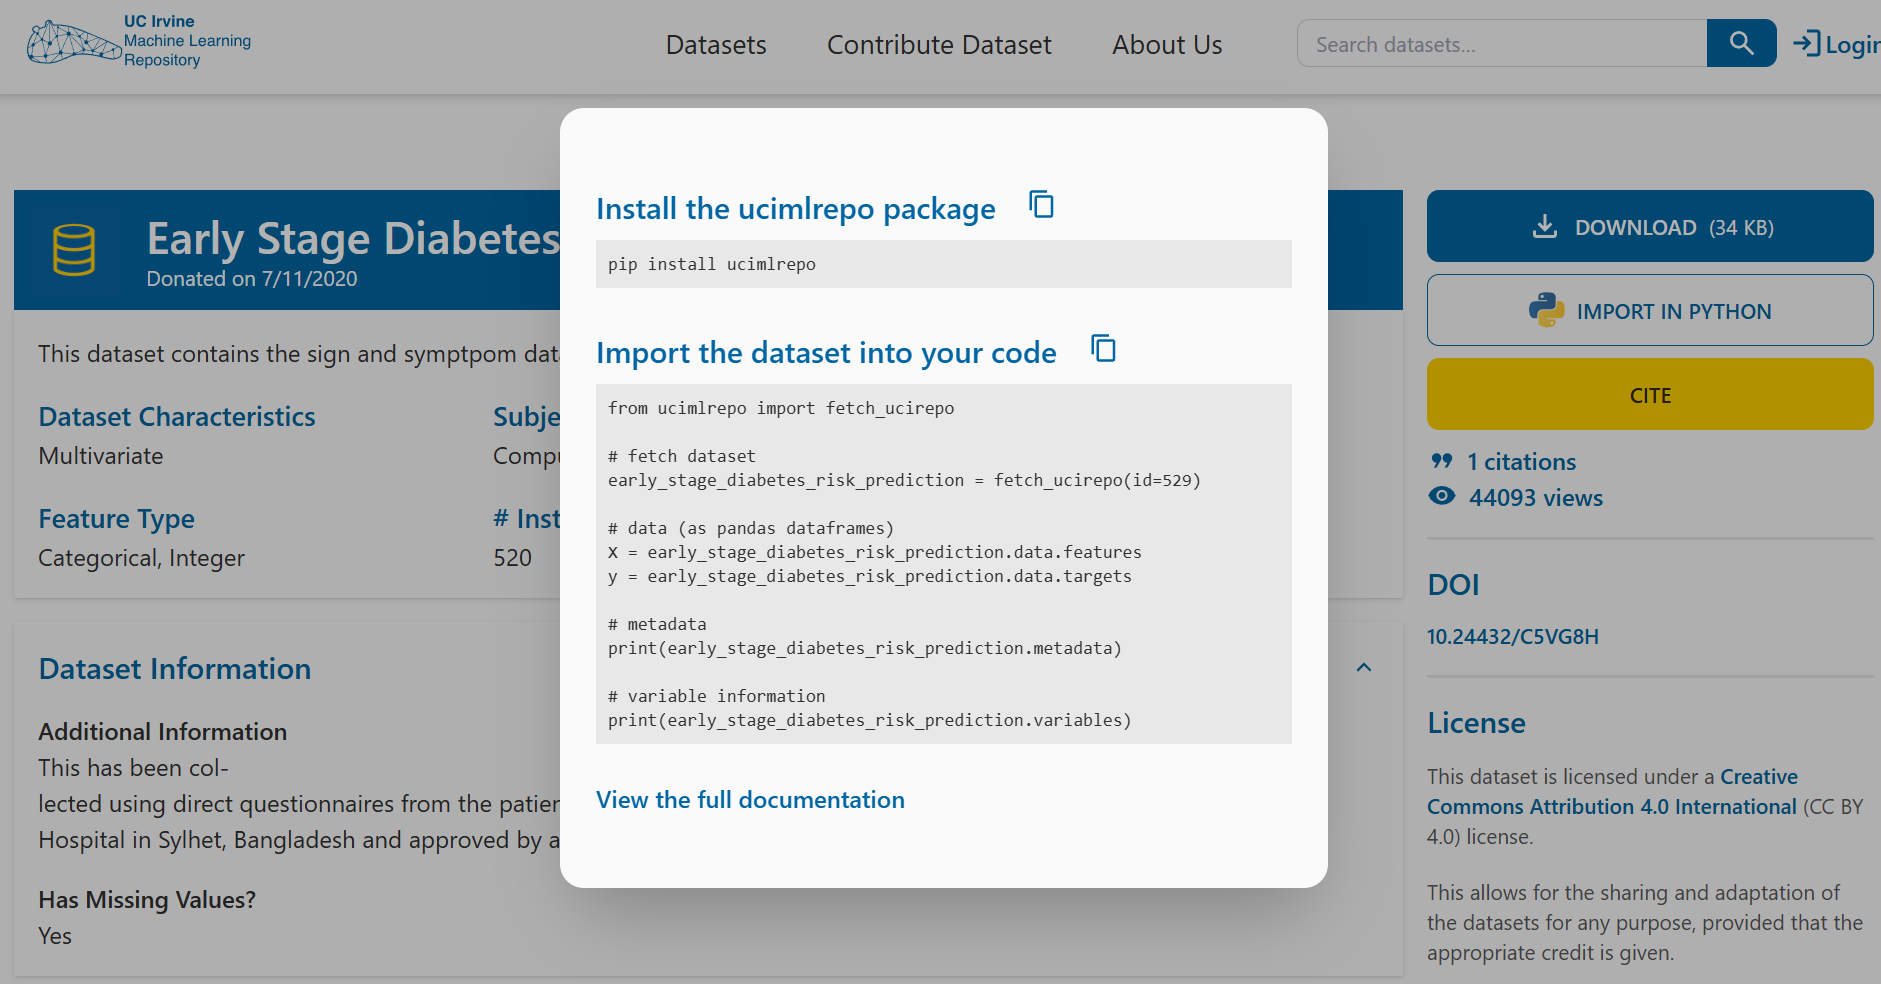


In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
early_stage_diabetes_risk_prediction = fetch_ucirepo(id=529)

# data (as pandas dataframes)
X = early_stage_diabetes_risk_prediction.data.features
y = early_stage_diabetes_risk_prediction.data.targets

data = early_stage_diabetes_risk_prediction.data.original

data.to_csv("early_stage_diabetes_risk_prediction.csv", index=True)
print(data.info()) #untuk menampilkan info fitur-fitur yang ada di tabel

print(data.head()) #untuk menampilkan 5 baris pertama


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    object
 3   polydipsia          520 non-null    object
 4   sudden_weight_loss  520 non-null    object
 5   weakness            520 non-null    object
 6   polyphagia          520 non-null    object
 7   genital_thrush      520 non-null    object
 8   visual_blurring     520 non-null    object
 9   itching             520 non-null    object
 10  irritability        520 non-null    object
 11  delayed_healing     520 non-null    object
 12  partial_paresis     520 non-null    object
 13  muscle_stiffness    520 non-null    object
 14  alopecia            520 non-null    object
 15  obesity             520 non-null    object
 16  class               520 no

Letakkan jika anda ingin data dalam bentuk csv

In [3]:
from google.colab import files
files.download('early_stage_diabetes_risk_prediction.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Eksplorasi Data

### VIsualisasi Data

In [4]:
display(data) #display dataset

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


#### Tampilkan banyaknya class

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

# Ambil dataset Early Stage Diabetes Risk Prediction
early_stage_diabetes_risk_prediction = fetch_ucirepo(id=529)

# Ambil fitur dan target
X = early_stage_diabetes_risk_prediction.data.features
y = early_stage_diabetes_risk_prediction.data.targets

# Gabungkan fitur dan target
data = pd.concat([X, y], axis=1)

/tmp/ipython-input-6-4223954437.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='class', palette='Set2')


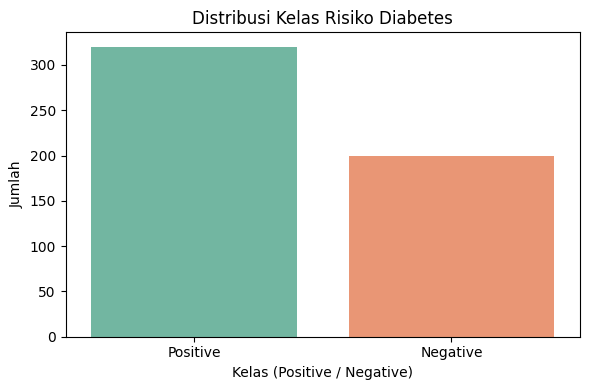

In [6]:
# Plot distribusi kelas
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='class', palette='Set2')
plt.title('Distribusi Kelas Risiko Diabetes')
plt.xlabel('Kelas (Positive / Negative)')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

## Struktur Dataset

### Fitur dan Tabel

In [7]:
data.shape #untuk mengetahui bentuk dataset(baris & kolom)

(520, 17)

Terdapat 520 baris dan 17 kolom.

In [8]:
data.columns #untuk mengetahui kolom-kolom yang ada pada dataset

Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

**Fitur adalah atribut atau variabel independen dalam dataset yang digunakan untuk membuat prediksi.**

Terdapat 16 fitur pada dataset ini:

*   age
Umur pasien (dalam tahun). Nilai numerik (integer).

*   gender
Jenis kelamin pasien: Male atau Female.

*   polyuria
Sering buang air kecil. Nilai kategorikal: Yes atau No.

*   polydipsia
Rasa haus yang berlebihan. Kategorikal: Yes atau No.

*   sudden_weight_loss
Penurunan berat badan secara tiba-tiba. Kategorikal: Yes atau No.

*   weakness
Merasa lemah atau kurang tenaga. Kategorikal: Yes atau No.

*   polyphagia
Nafsu makan berlebihan. Kategorikal: Yes atau No.

*   genital_thrush
Infeksi jamur pada area genital. Kategorikal: Yes atau No.

*   visual_blurring
Penglihatan kabur. Kategorikal: Yes atau No.

*   itching
Gatal-gatal pada kulit. Kategorikal: Yes atau No.

*   irritability
Mudah marah atau tersinggung. Kategorikal: Yes atau No.

*   delayed_healing
Luka sulit sembuh. Kategorikal: Yes atau No.

*   partial_paresis
Kelemahan otot parsial.Kategorikal: Yes atau No.

*   muscle_stiffness
Kekakuan otot. Kategorikal: Yes atau No.

*   alopecia
Kerontokan rambut. Kategorikal: Yes atau No.

*   obesity
Indikasi pasien mengalami obesitas. Kategorikal: Yes atau No.

Label adalah variabel dependen (target) yang menjadi tujuan dari prediksi model. Dalam dataset ini, label terdapat pada kolom class, yang menunjukkan status risiko diabetes:

* Positive: Pasien menunjukkan indikasi risiko diabetes tahap awal.

* Negative: Pasien tidak menunjukkan indikasi risiko diabetes.

In [9]:
data.dtypes #untuk mengetahui tipe data dari masing-masing kolom

,0
age,int64
gender,object
polyuria,object
polydipsia,object
sudden_weight_loss,object
weakness,object
polyphagia,object
genital_thrush,object
visual_blurring,object
itching,object


## Identifikasi Kualitas Dataset

### Deteksi Missing Value

Missing value merupakan data yang hilang pada suatu dataset. Hal ini bisa terjadi oleh beberapa faktor, diantaranya adalah :

* Interviewer recording error terjadi akibat kelalaian petugas pengumpul data (pewawancara), misalnya ada sejumlah pertanyaan yang terlewatkan.

* Respondent inability error terjadi akibat ketidakmampuan responden dalam memberikan jawaban akurat, misalnya karena tidak memahami pertanyaan, bosan atau kelelahan (respondent fatigue) akhirnya responden mengosongkan sejumlah pertanyaan atau berhenti mengisi kuesioner di tengah jalan.

* Unwillingness respondent error terjadi karena responden tidak berkenan memberikan jawaban yang akurat, misalnya pertanyaan soal penghasilan, usia, berat badan, pengalaman melakukan pelanggaran hukum, dll.

Cara penanganan Missing Values :

* Mengabaikan dan membuang missing data.

* Estimasi parameter.

* Imputasi.

Pada kolom di bawah ini akan dilakukan pendeteksian missing values terlebih dahulu pada masing-masing kolom.

In [10]:
# Cek apakah ada missing value di setiap kolom
missing_values = data.isnull().sum()

# Tampilkan hasilnya
print("Jumlah Missing Value per Kolom:\n")
print(missing_values)

# (Opsional) Tampilkan kolom mana saja yang punya missing value
print("\nKolom dengan missing value:")
print(missing_values[missing_values > 0])

Jumlah Missing Value per Kolom:

age                   0
gender                0
polyuria              0
polydipsia            0
sudden_weight_loss    0
weakness              0
polyphagia            0
genital_thrush        0
visual_blurring       0
itching               0
irritability          0
delayed_healing       0
partial_paresis       0
muscle_stiffness      0
alopecia              0
obesity               0
class                 0
dtype: int64

Kolom dengan missing value:
Series([], dtype: int64)


**Didapatkan missing value 0 pada setiap fitur**

# Prepocessing Data

Preprocessing dilakukan untuk:

* Menghindari bias algoritma akibat skala fitur

* Meningkatkan akurasi model

* Memastikan data bersih dan siap digunakan

## Transformasi Data

Transformasi data sangat diperlukan dalam preprocessing sebelum digunakan oleh model machine learning, terutama ketika dataset berisi tipe data kategorikal dan numerik yang belum siap diproses langsung oleh algoritma.

Berikut adalah penjelasan mengapa transformasi data diperlukan:

1. Algoritma ML hanya bisa membaca angka

2. Standarisasi skala fitur numerik

3. Akurasi model meningkat

4. Mencegah error saat training

In [14]:
from sklearn.preprocessing import LabelEncoder

# Salin data agar tidak merusak aslinya
data_encoded = data.copy()

# Loop setiap kolom kategorikal dan encode
for col in data_encoded.columns:
    if data_encoded[col].dtype == 'object':
        le = LabelEncoder()
        data_encoded[col] = le.fit_transform(data_encoded[col])

data_encoded.head()


,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


### Korelasi antar fitur (setelah encoded)

Korelasi membantu mengetahui hubungan antar fitur dan dengan target. Jika dua fitur sangat berkorelasi (>0.9), bisa saja salah satu dihapus (redundan). Korelasi dengan label (class) bisa memberi gambaran fitur mana yang paling berpengaruh.

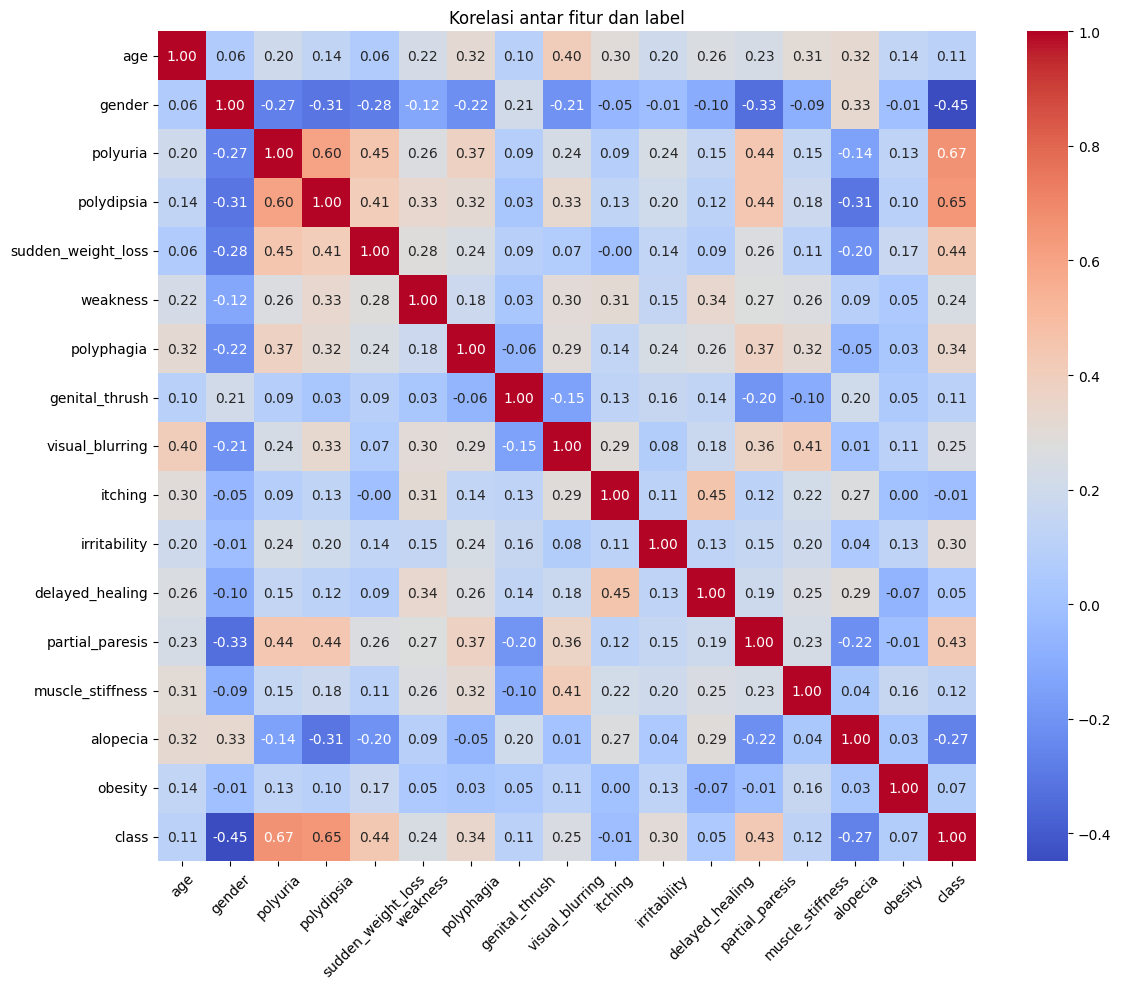

In [16]:
plt.figure(figsize=(12, 10))
sns.heatmap(data_encoded.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korelasi antar fitur dan label")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### Normalisasi (StandardScaler untuk semua fitur)

* Fitur numerik seperti age memiliki skala besar → ini bisa mengganggu model seperti KNN, SVM, Logistic Regression.

* Normalisasi membuat semua fitur setara dalam hal pengaruh terhadap model, dengan rata-rata 0 dan standar deviasi 1.

* Tanpa normalisasi, fitur besar bisa dominan secara tidak adil.

In [17]:
from sklearn.preprocessing import StandardScaler

# Pisahkan fitur dan label
X = data_encoded.drop('class', axis=1)
y = data_encoded['class']

# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Konversi ke DataFrame agar bisa divisualisasikan
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()


,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity
0,-0.661367,0.765092,-0.992337,1.109847,-0.846269,0.839594,-0.915126,-0.535844,-0.901025,1.027295,-0.565506,1.084312,-0.869918,1.290994,1.380227,2.215647
1,0.821362,0.765092,-0.992337,-0.901025,-0.846269,0.839594,-0.915126,-0.535844,1.109847,-0.973430,-0.565506,-0.922244,1.149534,-0.774597,1.380227,-0.451335
2,-0.578993,0.765092,1.007722,-0.901025,-0.846269,0.839594,1.092746,-0.535844,-0.901025,1.027295,-0.565506,1.084312,-0.869918,1.290994,1.380227,-0.451335
3,-0.249498,0.765092,-0.992337,-0.901025,1.181657,0.839594,1.092746,1.866215,-0.901025,1.027295,-0.565506,1.084312,-0.869918,-0.774597,-0.724518,-0.451335
4,0.986110,0.765092,1.007722,1.109847,1.181657,0.839594,1.092746,-0.535844,1.109847,1.027295,1.768328,1.084312,1.149534,1.290994,1.380227,2.215647


#### Visualisasi data yang sudah dinormalisasi

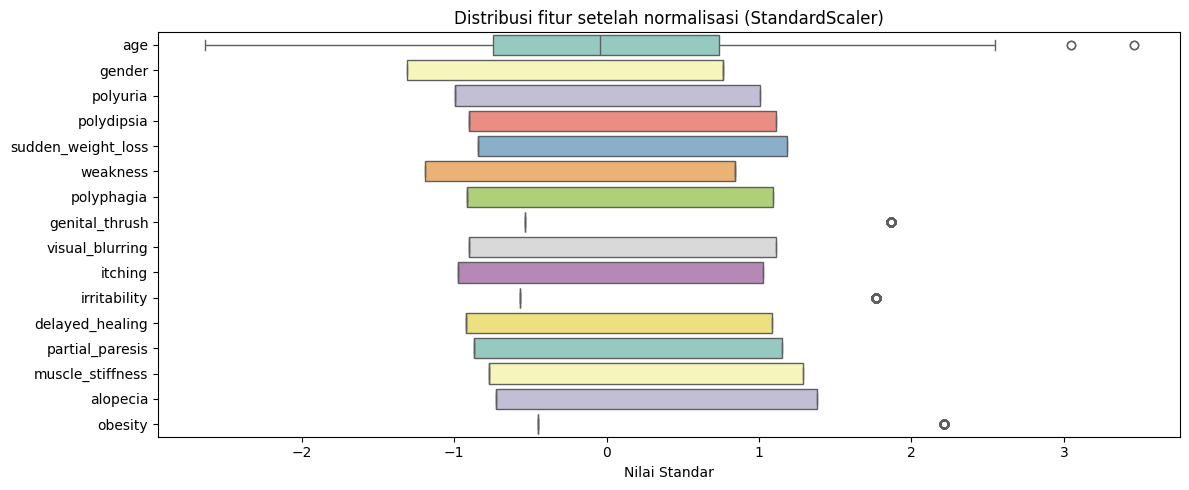

In [18]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=X_scaled_df, orient="h", palette="Set3")
plt.title("Distribusi fitur setelah normalisasi (StandardScaler)")
plt.xlabel("Nilai Standar")
plt.tight_layout()
plt.show()


Plot ini menunjukkan bahwa semua fitur sudah berada di skala yang rata-rata mendekati 0, dan terdistribusi seimbang.

# Modelling

## Modelling Klasifikasi Gausian Naive Bayes

Modeling merupakan proses pembuatan dan pengujian model statistik atau matematis yang digunakan untuk menggambarkan dan menganalisis pola atau hubungan dalam data. Tujuan utama dari pemodelan dalam data mining adalah untuk mengidentifikasi pola yang berguna atau prediksi yang akurat dari data yang tersedia.Untuk modelling kali ini bertujuan untuk menentukan class pada suatu data inputan .Data akan dibagi menjadi 2 tipe yaitu data test dan data train dan pemodelan kali ini menggunakan metode Gaussian Naive Bayes.

Pada bagian ini akan ditentukan severity dari data yang akan saya inputan apakah termasuk jinak atau ganas.

cara kalkulasi GNB dapat melalui tahap berikut:

1. Bagi Dataset menjadi data test dan data train

ada dua jenis pembagian rasio dataset yang sering digunakan yaitu:

* 80% data train dan 20% data test.

* 70% data train dan 30% data test.

Untuk kali ini kita akan menggunkan raiso 80% data train dan 20% data test,namun kalian bisa mengubahnya tergantung situasi dan kondisi dilapangan nantinya.

2. Mengghitung Probabilitas pada data train setiap sheet

lakukan perhitungan probabilitas dari masing-masing kelas sesuai dengan jumlah data train pada kelas tersebut kemudian dibagi dengan banyaknya total data train.

ini digunakan untuk menghitung Prior

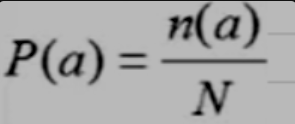

3. Menghitung Mean dan Standart dev

hitung mean dan standart deviasi setiap fitur pada setiap kelas di data train kita

4. lakukan perhitungan dengan rumus distribusi gaussian dengan rumus sebagai berikut:

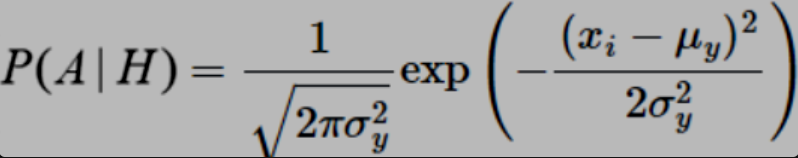

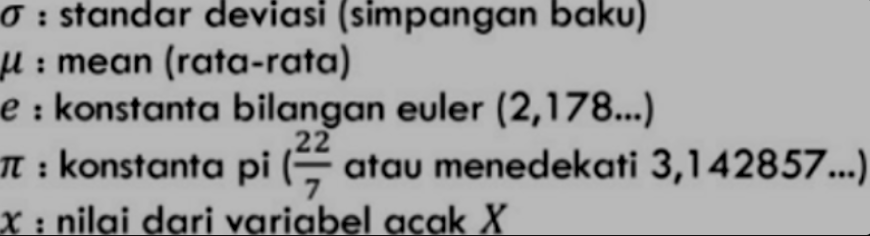

5. hitung posterior

Setelah didapat semua hasil dari distribusi gaussian, langkah selanjutnya adalah menentukan posteriori-nya. Berikut ini untuk rumusnya:

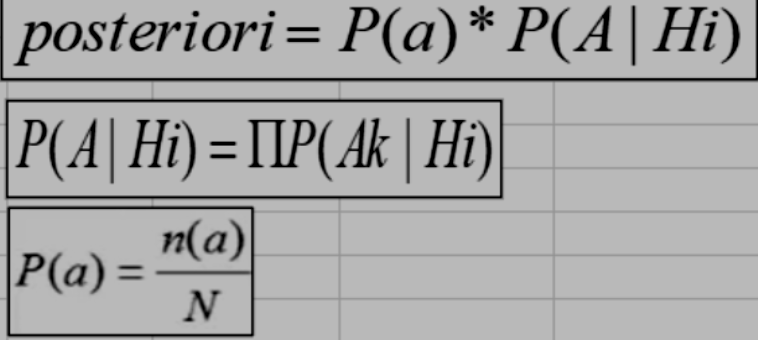


P(A|Hi) : hasil perkalian setiap fitur pada setiap kelas

P(a) : probabilitas setiap kelas

posteriori = P(A|Hi) * P(a)

6. tentukan maximum posterior

setelah kita menghitung semua posterior maka dapat kita cari mana yang terbesar

data posterior paling besar tersebut yang merupakan akan menjadi class dari data yang kita inputkan

In [23]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Asumsikan kamu sudah punya data asli
# Misal: data = pd.read_csv("early_stage_diabetes_risk_prediction.csv")

# Encode semua kolom kategorikal jadi numerik
data_encoded = data.copy()
for col in data_encoded.columns:
    if data_encoded[col].dtype == 'object':
        le = LabelEncoder()
        data_encoded[col] = le.fit_transform(data_encoded[col])

# Pisahkan fitur dan label
X = data_encoded.drop('class', axis=1)
y = data_encoded['class']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat model Gaussian Naive Bayes
gnb_model = GaussianNB()

# Latih model
gnb_model.fit(X_train, y_train)

# Prediksi
y_pred = gnb_model.predict(X_test)

# Evaluasi
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='binary')  # binary classification
rec = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Tampilkan hasil
print("========== HASIL EVALUASI NAIVE BAYES ==========")
print(f"Akurasi       : {acc:.2f}")
print(f"Presisi       : {prec:.2f}")
print(f"Recall        : {rec:.2f}")
print(f"F1-Score      : {f1:.2f}")

# Tampilkan data pelatihan dan pengujian
print("=========================== X TRAINING =================================")
print(X_train)
print("=========================== X TESTING =================================")
print(X_test)
print("=========================== Y TESTING =================================")
print(y_test)


========== HASIL EVALUASI NAIVE BAYES ==========
Akurasi       : 0.91
Presisi       : 0.93
Recall        : 0.94
F1-Score      : 0.94
=========================== X TRAINING =================================
     age  gender  polyuria  polydipsia  sudden_weight_loss  weakness  \
434   53       1         1           1                   1         1   
436   41       1         1           1                   1         1   
208   54       1         0           0                   1         1   
332   50       0         0           0                   0         1   
220   38       1         0           0                   0         0   
..   ...     ...       ...         ...                 ...       ...   
71    35       0         0           1                   1         1   
106   58       1         0           1                   1         1   
270   40       0         1           1                   1         1   
435   57       1         1           1                   1         1   
10

berikut cara menjadikan data train kita ke dalam bentuk csv.

In [24]:
import pandas as pd

# Concatenate X_train and y_train as new column
train_data = pd.concat([X_train, pd.Series(y_train, name='Severity')], axis=1)

# Save training data to CSV with tab-separated values
train_data.to_csv('Train_early_stage_diabetes_risk_prediction.csv', sep="\t", index=False)

uji coba inputan dengan data test menggunakan model yang kita buat.

In [25]:
# Menampilkan data asli baris ke-230 (karena index mulai dari 0)
print("Data yang akan digunakan adalah:")
print(data.iloc[230])

# Siapkan input baru sesuai urutan kolom dataset
# Kolom: ['age', 'gender', 'polyuria', ..., 'obesity']
# Nilai inputan harus sesuai format kategorikal (Yes/No, Male/Female, int)

input_dict = {
    'age': 50,
    'gender': 'Male',
    'polyuria': 'Yes',
    'polydipsia': 'Yes',
    'sudden_weight_loss': 'No',
    'weakness': 'Yes',
    'polyphagia': 'No',
    'genital_thrush': 'No',
    'visual_blurring': 'No',
    'itching': 'No',
    'irritability': 'No',
    'delayed_healing': 'No',
    'partial_paresis': 'No',
    'muscle_stiffness': 'No',
    'alopecia': 'No',
    'obesity': 'No'
}

# Ubah input_dict ke DataFrame
input_df = pd.DataFrame([input_dict])

# Encode input sesuai label encoder yang sama
input_encoded = input_df.copy()
for col in input_encoded.columns:
    if input_encoded[col].dtype == 'object':
        le_input = LabelEncoder()
        le_input.fit(data[col])  # gunakan data asli untuk fit encoder
        input_encoded[col] = le_input.transform(input_encoded[col])

# Prediksi
prediction = gnb_model.predict(input_encoded)[0]

# Inverse label hasil prediksi
final_result = LabelEncoder()
final_result.fit(data['class'])
predicted_class_label = final_result.inverse_transform([prediction])[0]

# Tampilkan hasil
print("Hasil prediksi:")
print(f"Data yang diinputkan diprediksi sebagai class = {predicted_class_label}")


Data yang akan digunakan adalah:
age                         35
gender                    Male
polyuria                    No
polydipsia                  No
sudden_weight_loss         Yes
weakness                   Yes
polyphagia                  No
genital_thrush             Yes
visual_blurring             No
itching                     No
irritability                No
delayed_healing             No
partial_paresis             No
muscle_stiffness            No
alopecia                    No
obesity                     No
class                 Negative
Name: 230, dtype: object
Hasil prediksi:
Data yang diinputkan diprediksi sebagai class = Positive


Hasil prediksi:
Data yang diinputkan diprediksi sebagai class = Positive

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')   # karena label hanya 2 kelas
recall = recall_score(y_test, y_pred, average='binary')
fscore = f1_score(y_test, y_pred, average='binary')

# Menampilkan hasil evaluasi
print("========== EVALUASI MODEL NAIVE BAYES ==========")
print(f'Akurasi  : {accuracy:.2f}')
print(f'Presisi  : {precision:.2f}')
print(f'Recall   : {recall:.2f}')
print(f'F1-Score : {fscore:.2f}')


========== EVALUASI MODEL NAIVE BAYES ==========
Akurasi  : 0.91
Presisi  : 0.93
Recall   : 0.94
F1-Score : 0.94


## Modelling Klasifikasi KNN


K-Nearest Neighbors (KNN) merupakan sebuah cara untuk mengklasifikasikan dengan cara melihat sesuatu yang berada di dekatnya. KNN juga disebut dengan Algoritna oembelajar malas. Karena tidak memerlukan pembelajaran terlebih dahulu, dan langsung meyimpan data set dan pada saat klaifikasi melakukan set data. KNN bekerja dengan menggunakan kedekatan dan pemungutan suara mayoritas untuk membuat prediksi atau forecasting. Pada KNN terdapat istilah “k”. “k” merupakan angka yang memberi tahu algoritma beberapa banya titik terdekat (tetangga) yang digunakan untuk membuat keputusan. Contohnya: Misalkan menntukan nama buah dan membandingkannya dengan buah yang telah dikenal. kemudian menggunakan nilai “k” sebanyak 3 kemudian 2 dari 3 merupakan buah apel dan 1 dari 3 merupakan buah pisang. jadi algoritma ini mengatakan bahwa buah tersebut merupakan apel karena sebagian besar tetangganya apel.

### Menetukan Nilai "k"

Dalam KNN, pemilihan nilai “k” sangat penting untuk menentukan hipotesis hasil dari prediksi. Jika kumpulan data memiliki outlier atau noise yang signifikan, nilai “k” yang lebih tinggi dapat membantu memperhalus prediksi dan mengurangi data yang noise. Namun, pemilihan nilai yang tinggi dapat menyebabkan underfitting.

Pertama, kita harus menentukan nilai K terlebih dahulu. Penentuan nilai K ini tidak ada rumus pastinya. Namun satu tips yang dapat dipertimbangkan, yakni jika kelas berjumlah genap maka sebaiknya nilai K-nya ganjil, sebaliknya jika kelas berjumlah ganjil maka sebaiknya nilai K-nya genap. Dalam prakteknya di Python, Anda dapat menghitung menggunakan kode program untuk mencari nilai K terbaik dari berbagai opsi nilai (misalnya dari K=2 sampai K=10).

### Hitung jarak antara data baru dan masing-masing data lainnya

menghitung jarak menggunakan metode Euclidean distance

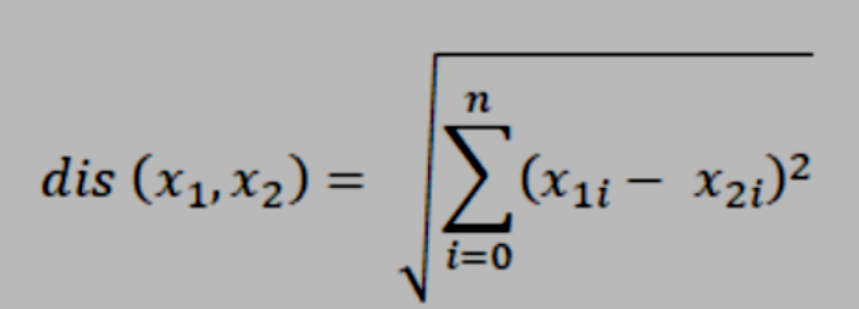

Jika ada lebih dari satu, kita dapat menjumlahkannya seperti di bawah ini.

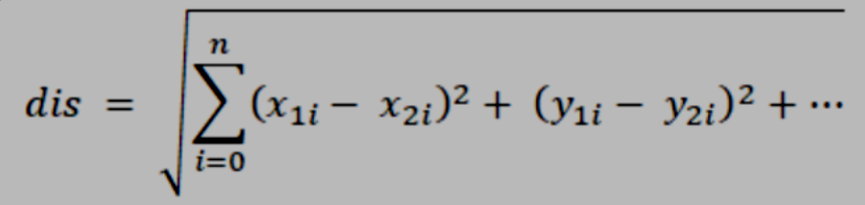

Ambil tiga data dengan jarak terdekat. Dari perhitungan Euclidean distance di atas, jika kita rangkum dari jarak terdekat

### Impelementasi KNN menggunakan Scikit Learn

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# -------------------- PREPROCESS --------------------
# Salin data dan encode semua kolom kategorikal ke numerik
data_encoded = data.copy()
label_encoders = {}  # untuk menyimpan encoder tiap kolom

for col in data_encoded.columns:
    if data_encoded[col].dtype == 'object':
        le = LabelEncoder()
        data_encoded[col] = le.fit_transform(data_encoded[col])
        label_encoders[col] = le  # simpan untuk nanti

# -------------------- SPLIT --------------------
X = data_encoded.drop('class', axis=1)
y = data_encoded['class']  # sudah dalam bentuk angka (0/1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------- KNN MODEL --------------------
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# -------------------- EVALUASI --------------------
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='binary')
recall_knn = recall_score(y_test, y_pred_knn, average='binary')
f1_knn = f1_score(y_test, y_pred_knn, average='binary')

# -------------------- OUTPUT --------------------
print("========== EVALUASI MODEL KNN ==========")
print(f'Akurasi  : {accuracy_knn:.2f}')
print(f'Presisi  : {precision_knn:.2f}')
print(f'Recall   : {recall_knn:.2f}')
print(f'F1-Score : {f1_knn:.2f}')

# Tampilkan laporan klasifikasi
print("\n=== Classification Report KNN ===")
class_le = label_encoders['class']
print(classification_report(y_test, y_pred_knn, target_names=class_le.classes_))


========== EVALUASI MODEL KNN ==========
Akurasi  : 0.86
Presisi  : 0.95
Recall   : 0.83
F1-Score : 0.89

=== Classification Report KNN ===
              precision    recall  f1-score   support

    Negative       0.71      0.91      0.80        33
    Positive       0.95      0.83      0.89        71

    accuracy                           0.86       104
   macro avg       0.83      0.87      0.84       104
weighted avg       0.88      0.86      0.86       104



## Modelling Klasifikasi Decision Tree

Decision Tree (Pohon Keputusan) adalah algoritma machine learning yang membangun model prediksi dalam bentuk struktur pohon. Algoritma ini memecah dataset menjadi himpunan data yang lebih kecil dan lebih murni secara bertahap, di mana setiap pemecahan didasarkan pada fitur data yang memberikan informasi paling banyak.

---
### Konsep dan Rumus Inti (Decision Tree - C4.5 / ID3)

#### **1. Entropy (Ukuran Ketidakpastian)**
Entropy digunakan untuk mengukur tingkat ketidakmurnian atau ketidakpastian dalam dataset. Nilai entropy 0 berarti semua data berada dalam satu kelas, sedangkan nilai lebih tinggi menandakan data tersebar di berbagai kelas.

$$
Entropy(S) = \sum_{i=1}^{c} -p_i \log_2(p_i)
$$  
* $p_i$ = proporsi data pada kelas ke-i dari total data.

#### **2. Information Gain (Pengurangan Ketidakpastian)**
Information Gain digunakan untuk memilih fitur terbaik sebagai node cabang dalam pohon keputusan. Fitur yang memberikan pengurangan ketidakpastian terbesar (gain tertinggi) akan dipilih.

$$
Gain(S, A) = Entropy(S) - \sum_{v \in \text{Values}(A)} \frac{|S_v|}{|S|} \cdot Entropy(S_v)
$$

---

### Penerapan pada Dataset Early Stage Diabetes Risk Prediction

Dataset ini terdiri dari **2 kelas utama**:
- **Positive** → Pasien berisiko diabetes
- **Negative** → Pasien tidak berisiko diabetes

Terdapat **16 fitur kategorikal dan numerik**, antara lain:
- `age` (numerik)
- `gender`, `polyuria`, `polydipsia`, `sudden_weight_loss`, `weakness`, `polyphagia`, `genital_thrush`, `visual_blurring`, `itching`, `irritability`, `delayed_healing`, `partial_paresis`, `muscle_stiffness`, `alopecia`, `obesity` (semua kategorikal: Yes/No atau Male/Female)

Karena fitur-fitur pada dataset ini sebagian besar **bersifat kategorikal**, maka:
- Decision Tree akan memisahkan data berdasarkan nilai kategori, seperti:  
  `polyuria = Yes → kanan`, `No → kiri`
- Untuk fitur numerik seperti `age`, decision tree dapat membuat threshold, contoh:  
  `age <= 45.5 → kiri`, `> 45.5 → kanan`

---

### Contoh Proses Pembangunan Pohon

#### Langkah 1: Menghitung Entropy Awal (Entropy(S))

Misalkan:
- Jumlah data = 520
- Distribusi kelas:
  - Positive = 320
  - Negative = 200

$$
Entropy(S) = -\frac{320}{520}\log_2(\frac{320}{520}) - \frac{200}{520}\log_2(\frac{200}{520}) \approx 0.97
$$

#### Langkah 2: Menghitung Gain untuk Setiap Fitur

Misal, untuk fitur `polyuria`, data dipisah berdasarkan nilainya:

- $S_1$: data dengan `polyuria = Yes`
- $S_2$: data dengan `polyuria = No`

Hitung entropy masing-masing subset, lalu gunakan rumus:

$$
Gain(S, polyuria) = Entropy(S) - \left( \frac{|S_1|}{|S|}Entropy(S_1) + \frac{|S_2|}{|S|}Entropy(S_2) \right)
$$

Lakukan hal serupa untuk fitur lain. Fitur dengan nilai gain tertinggi akan dijadikan node cabang.

---

### **Contoh Struktur Pohon Hasil Training (Misal)**


```
polyuria = Yes?
|
|--- Yes ---> polydipsia = Yes?
|           |
|           |--- Yes ---> class: Positive
|           |--- No ----> class: Positive
|
|--- No --> itching = Yes?
            |
            |--- Yes ---> class: Negative
            |--- No ----> class: Negative


```



### Implementasi Decision Tree dengan Scikit-learn

etelah kita memahami cara kerja Decision Tree secara manual dengan menghitung Entropy dan Information Gain, kini saatnya kita melihat bagaimana proses ini dilakukan secara otomatis menggunakan library machine learning populer, yaitu Scikit-learn (sklearn). Scikit-learn menyediakan implementasi Decision Tree yang efisien dan siap pakai.

Kita akan menggunakan data yang sudah didiskretisasi sebelumnya, lalu melatih model DecisionTreeClassifier dari Scikit-learn untuk membangun pohon keputusan. Hasil pohon yang dibangun oleh Scikit-learn ini seharusnya konsisten dengan logika perhitungan manual yang sudah kita lakukan.

Terakhir, kita akan memvisualisasikan pohon yang dihasilkan oleh Scikit-learn untuk melihat strukturnya secara grafis.

In [34]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import joblib

# Fetch dataset dari UCI
diabetes_data = fetch_ucirepo(id=529)

# Ambil fitur dan label
X = diabetes_data.data.features
y = diabetes_data.data.targets

# Gabungkan jika ingin menyimpan atau melihat struktur lengkap
data = pd.concat([X, y], axis=1)

# Ubah seluruh kolom kategorikal menjadi numerik dengan LabelEncoder
X_encoded = X.copy()
for col in X_encoded.columns:
    if X_encoded[col].dtype == 'object':
        X_encoded[col] = LabelEncoder().fit_transform(X_encoded[col])

# Encode label target ('Positive'/'Negative')
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split train-test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=0)
# Simpan model Decision Tree
joblib.dump(dt_model, 'decision_tree_model.pkl')


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['decision_tree_model.pkl']

#### Training Decison Tree

In [29]:
# Buat dan latih model Decision Tree dengan entropy
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
dt_model.fit(X_train, y_train)

# Prediksi
y_pred_dt = dt_model.predict(X_test)

#### Evaluasi Model Decision Tree

In [32]:
# Evaluasi kinerja
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='macro')
recall_dt = recall_score(y_test, y_pred_dt, average='macro')
f1_dt = f1_score(y_test, y_pred_dt, average='macro')

# Tampilkan hasil evaluasi
print("========== EVALUASI MODEL DECISION TREE ==========")
print(f'Akurasi : {accuracy_dt:.2f}')
print(f'Presisi : {precision_dt:.2f}')
print(f'Recall  : {recall_dt:.2f}')
print(f'F1-Score: {f1_dt:.2f}')

# Tampilkan klasifikasi per kelas
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred_dt, target_names=le.classes_))


========== EVALUASI MODEL DECISION TREE ==========
Akurasi : 0.94
Presisi : 0.94
Recall  : 0.94
F1-Score: 0.94

=== Classification Report ===
              precision    recall  f1-score   support

    Negative       0.93      0.93      0.93        40
    Positive       0.95      0.95      0.95        64

    accuracy                           0.94       104
   macro avg       0.94      0.94      0.94       104
weighted avg       0.94      0.94      0.94       104



#### Visualisasi Pohon Keputusan

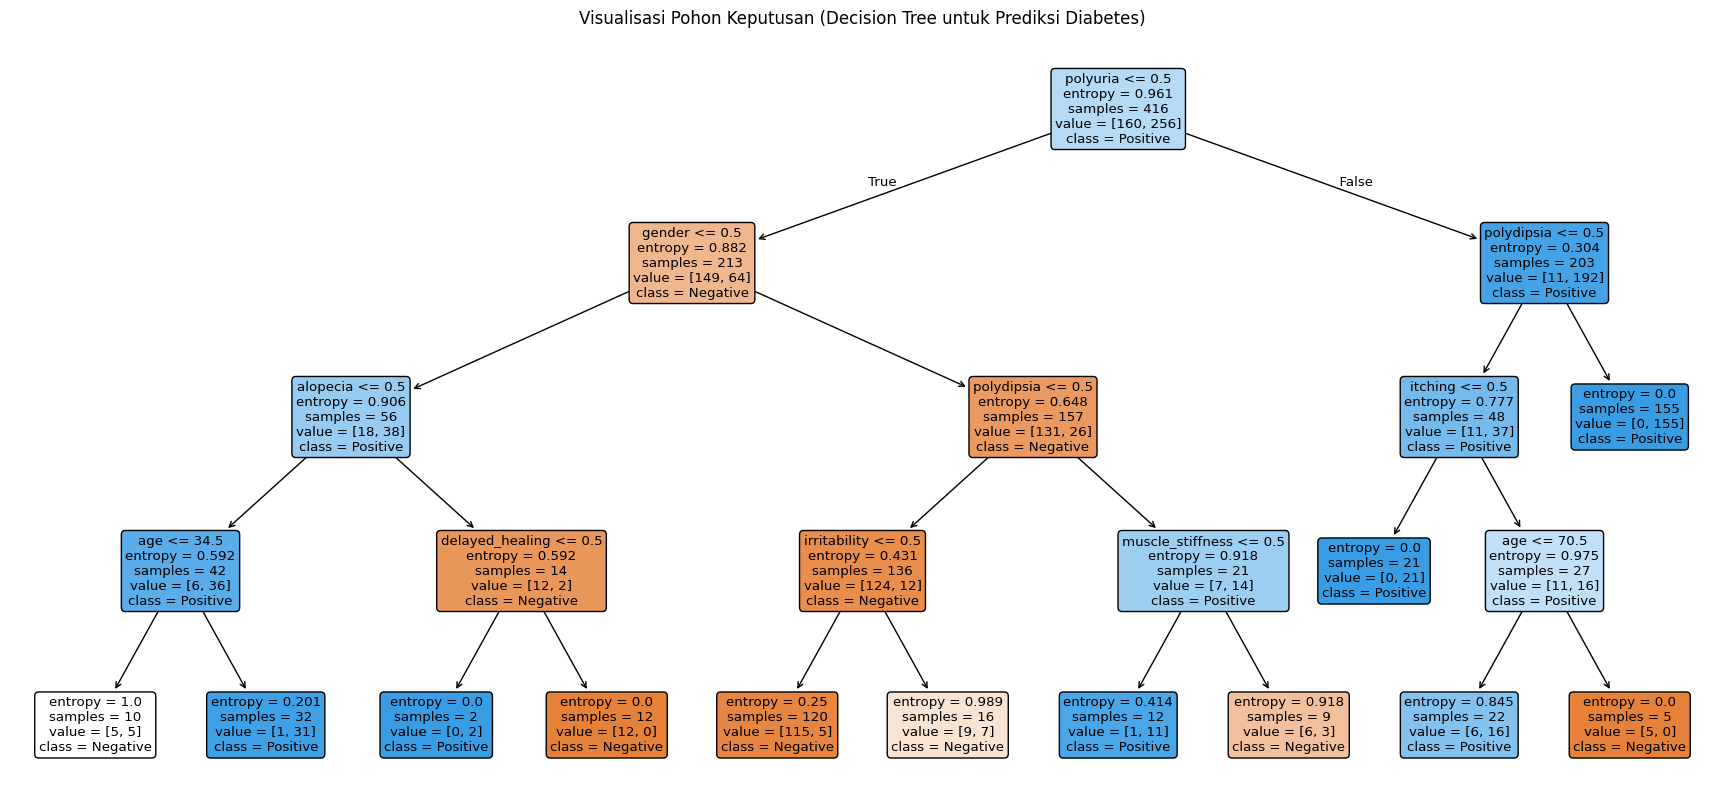

In [33]:
# Visualisasi pohon keputusan
plt.figure(figsize=(22,10))
plot_tree(dt_model,
          feature_names=X_encoded.columns,  # kolom numerik hasil LabelEncoder
          class_names=le.classes_,          # nama label asli (Positive/Negative)
          filled=True,
          rounded=True)
plt.title("Visualisasi Pohon Keputusan (Decision Tree untuk Prediksi Diabetes)")
plt.show()

Pohon keputusan yang dihasilkan menggunakan algoritma C4.5 / ID3 dengan criterion='entropy' menunjukkan struktur pembelajaran berdasarkan fitur yang paling berpengaruh terhadap klasifikasi diabetes positif atau negatif.

🌳 Node Akar (Root Node):
* Fitur paling berpengaruh pertama: polyuria

* Threshold awal: polyuria <= 0.5
Artinya, pasien yang tidak mengalami polyuria lebih cenderung Negatif, sementara pasien yang mengalami polyuria lebih cenderung Positif.

Berdasarkan urutan pembelahan pada pohon:

1. polyuria: Gejala sering buang air kecil – menjadi fitur paling krusial.

2. polydipsia: Rasa haus berlebihan – muncul pada cabang kanan dan kiri.

3. gender, alopecia, itching, irritability, age, dan delayed_healing juga berkontribusi, terutama untuk klasifikasi lebih lanjut.

# Evaluasi

Dari ketiga model yang dibuat dapat dilihat akurasi dari masing-masing model, yaitu:

1. Naive Bayes: memiliki akurasi 0.91

2. KNN: memiliki akurasi 0.86

3. Decision Tree: memiliki akurasi 0.94

Dari ketiga model diatas dapat disimpulkan bahwa single model Decision Tree memiliki akurasi tertinggi yaitu 94%.

# Deployment

## Menyimpan Model

pada tahap ini saya akan menyimpan model dari single model Decision Tree yang sudah dibuat. Tujuan dilakukan penyimpanan model adalah supaya mudah dipanggil ketika akan memasuki tahap deployment.

Untuk library yang saya gunakan dalam menyimpan model yaitu joblib.

In [38]:
import joblib

# Simpan model Decision Tree
joblib.dump(dt_model, 'decision_tree_model.pkl')
# Load kembali model Decision Tree
dt_model = joblib.load('decision_tree_model.pkl')
joblib.dump(le, 'label_encoder.pkl')



['label_encoder.pkl']

In [37]:
from google.colab import files
files.download('decision_tree_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [39]:
from google.colab import files
files.download('label_encoder.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Integrasi Model Dengan Web
* install library Streamlit, dengan menjalankan perintah “pip install streamlit” pada terminal.

* membuat file berekstensi .py, misal app.py.

didalam app.py saya panggil model yang telah disimpan.

* setelah itu saya membuat tampilan informasi keterangan tentang inputan dan hasil evaluasi. selain itu saya juga membuat tampilan form untuk user menginputkan data yang akan diprediksi oleh model berserta tampilan untuk hasil prediksi. untuk tampilan saya masukkan code nya didalam file app.py juga, karena dimudahkan oleh library streamlit.

Source code yang telah saya buat dapat diakses melalui link berikut :

https://github.com/yudhacm/uas_pendata

## Hasil Web
link web: https://uaspendatayudhacaesarmaulana.streamlit.app/

Berikut adalah hasil dari webnya. Terdapat form untuk memasukkan fitur-fitur yang nantinya akan diprediksi.

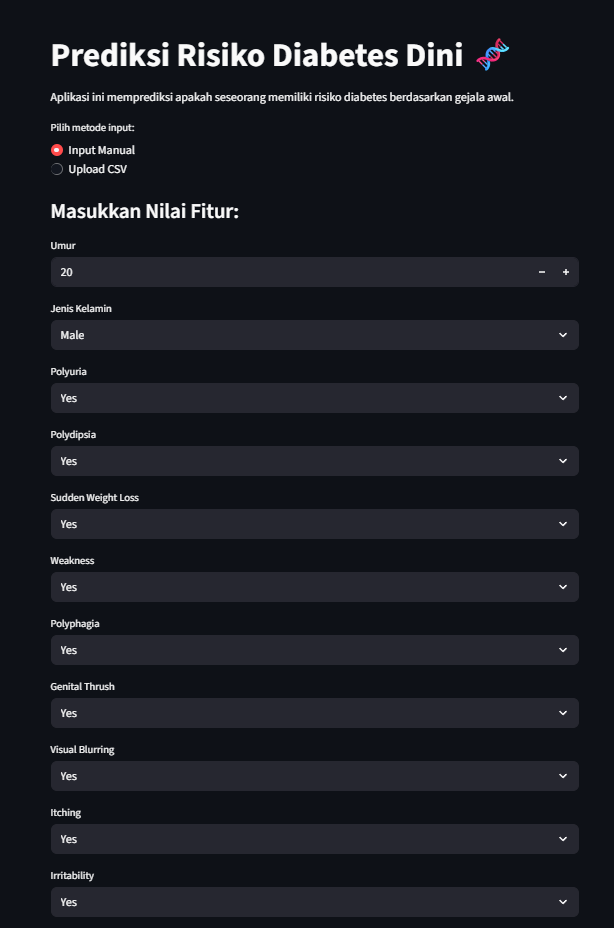

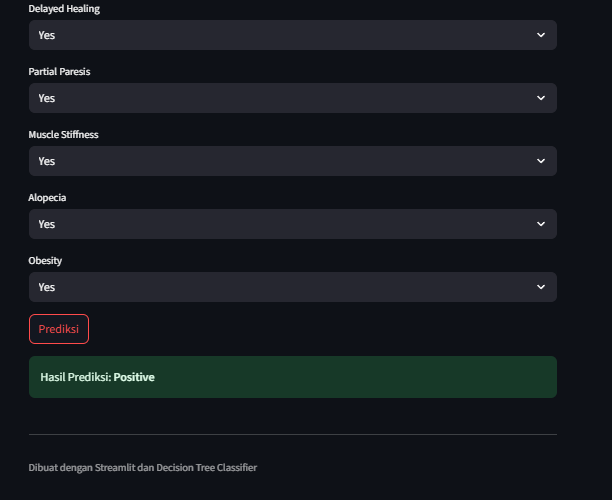